# Avaliador de Resultados

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Esperados

In [123]:
df_esperados = pd.read_csv('../result/esperados.csv', sep=';')
df_esperados.head()

,QueryNumber,DocNumber,DocVotes
0,1,139,4
1,1,151,4
2,1,166,1
3,1,311,1
4,1,370,2


### Com Stemmer

In [124]:
df_stem = pd.read_csv('../result/resultados-stemmer.csv', sep=';')

df_stem_split = df_stem['ResultList'].str.split(', ', expand=True)

df_stem['DocPosition'] = df_stem_split[0].str[1:]
df_stem['DocNumber'] = df_stem_split[1]
df_stem['ElementDistance'] = df_stem_split[2].str[:-1]

df_stem.drop(columns=['ResultList'], inplace=True)

df_stem.head()

,QueryId,DocPosition,DocNumber,ElementDistance
0,1,1,484,0.2210348059872781
1,1,2,437,0.20071038791325813
2,1,3,957,0.1709966846928236
3,1,4,526,0.166461813609632
4,1,5,827,0.16326113645715498


### Sem Stemmer

In [125]:
df_nostem = pd.read_csv('../result/resultados-nostemmer.csv', sep=';')

df_nostem_split = df_nostem['ResultList'].str.split(', ', expand=True)

df_nostem['DocPosition'] = df_nostem_split[0].str[1:]
df_nostem['DocNumber'] = df_nostem_split[1]
df_nostem['ElementDistance'] = df_nostem_split[2].str[:-1]

df_nostem.drop(columns=['ResultList'], inplace=True)

df_nostem.head()

,QueryId,DocPosition,DocNumber,ElementDistance
0,1,1,437,0.21901474567304474
1,1,2,484,0.20909903368469954
2,1,3,498,0.16591723658932545
3,1,4,526,0.15869120191669298
4,1,5,741,0.14835756463307


## Gráfico de 11 pontos de precisão e recall

In [145]:
def generate_precision_recall(points, result, expected, csv_filename, plot_filename):
    queries_set = set(result['QueryId'].to_list())
    precisions_list = []
    recalls_list = []
    
    for query in queries_set:
        relevant_docs = set(expected[expected['QueryNumber'] == query]['DocNumber'])
        retrieved_docs = result[result['QueryId'] == query]['DocNumber']
        if len(retrieved_docs) == 0:
            continue
        
        precisions = []
        recalls = []
        step = max(1, len(retrieved_docs) // points)
        
        for point in range(step, len(retrieved_docs) + 1, step):
            current_retrieved = set(map(int,retrieved_docs[:point]))
           
            true_positives = len(current_retrieved.intersection(relevant_docs))
        
            precision = true_positives / len(current_retrieved)
            recall = true_positives / len(relevant_docs)
            
            precisions.append(precision)
            recalls.append(recall)
        
        precisions_list.append(precisions)
        recalls_list.append(recalls)
    
    mean_precisions = np.mean([np.pad(p, (0, points - len(p)), 'constant') for p in precisions_list], axis=0)
    mean_recalls = np.mean([np.pad(r, (0, points - len(r)), 'constant') for r in recalls_list], axis=0)
    
    plt.figure(figsize=(8, 6))
    plt.plot(mean_recalls, mean_precisions, marker='o')
    plt.title(f'{points} Points Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.savefig(plot_filename)
    plt.show()
    
    precision_recall_df = pd.DataFrame({'Precision': mean_precisions, 'Recall': mean_recalls})
    precision_recall_df.to_csv(csv_filename, sep=';', index=False)

### Com Stemmer

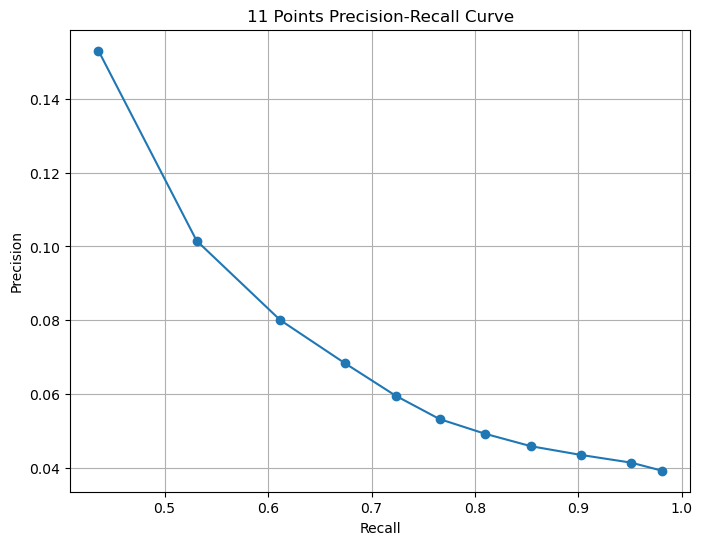

In [146]:
generate_precision_recall(11, df_stem, df_esperados, '../avalia/precision_recall.csv', '../avalia/precision_recall.pdf')